<a href="https://colab.research.google.com/github/Julyanrf/Klasifikasi-DBD-SVM-Multiclass/blob/main/SKRIPSI_KLASIFIKASI_DBD_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Package

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


In [2]:
#import database
df = pd.read_excel('/content/KASUS DB RS SOEWONDO.xlsx')
df.head()

,NO,ID,NAMA,Umur,Jenis Kelamin,Demam,Pendarahan,Hepatomlegali,Syok/Gelisah,Nadi Cepat,Pusing,Nyeri Otot/Sendi,Mual,Lemas,Ruam,Hipotensi,Trombosit,Hemoglobin,Hematokrit,Diagnosa
0,1,255682.0,Muhamad Agus Zakki,20 Tahun,Laki-Laki,Ya,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Ya,Ya,Tidak,Tidak,156000,17.0,46.5,DBD
1,2,343976.0,Panji Apriyanto,23 Tahun,Laki-Laki,Ya,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Ya,Ya,Tidak,Tidak,34000,16.0,44.3,DBD
2,3,344246.0,Rika Amelia,13 Tahun,Perempuan,Ya,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Ya,Ya,Tidak,Tidak,82000,13.1,38.5,DBD
3,4,326639.0,Nabil Marwan Falih,15 Tahun,Laki-Laki,Ya,Tidak,Tidak,Tidak,Tidak,Ya,Tidak,Ya,Ya,Tidak,Tidak,109000,16.0,45.8,DBD
4,5,365465.0,Muhammad Syamsul Hadi,14 Tahun,Laki-Laki,Ya,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Ya,Ya,Tidak,Tidak,34000,14.4,40.8,DBD


#Filtering Fitur

##Ubah Variabel Data

In [3]:
#duplikat data
df_int = df.copy()

In [4]:
# Bersihkan kolom umur (hilangkan "Tahun" dan "Bulan" ubah jadi int)
df_int['Umur'] = df['Umur'].str.extract('(\d+)').astype(int)

# Bersihkan kolom Hematokrit (ganti koma jadi titik lalu ubah ke float)
df_int['Hematokrit'] = df_int['Hematokrit'].astype(str).str.replace(',', '.').astype(float)

In [5]:
# kolom mana saja yang berisi 'Ya' dan 'Tidak'
biner_kolom =['Demam','Pendarahan','Hepatomlegali','Syok/Gelisah','Nadi Cepat',
                'Pusing','Nyeri Otot/Sendi','Mual','Lemas','Ruam','Hipotensi']

# Ubah semua 'Ya' jadi 1, 'Tidak' jadi 0
for col in biner_kolom:
    df_int[col] = df_int[col].str.strip().str.lower().replace({'Ya': 1, 'ya': 1, 'Tidak': 0, 'tidak': 0, '': 0})
df_int.head()

<ipython-input-5-d837b105445f>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_int[col] = df_int[col].str.strip().str.lower().replace({'Ya': 1, 'ya': 1, 'Tidak': 0, 'tidak': 0, '': 0})


,NO,ID,NAMA,Umur,Jenis Kelamin,Demam,Pendarahan,Hepatomlegali,Syok/Gelisah,Nadi Cepat,Pusing,Nyeri Otot/Sendi,Mual,Lemas,Ruam,Hipotensi,Trombosit,Hemoglobin,Hematokrit,Diagnosa
0,1,255682.0,Muhamad Agus Zakki,20,Laki-Laki,1,0,0,0,0,0,0,1,1,0,0,156000,17.0,46.5,DBD
1,2,343976.0,Panji Apriyanto,23,Laki-Laki,1,0,0,0,0,0,0,1,1,0,0,34000,16.0,44.3,DBD
2,3,344246.0,Rika Amelia,13,Perempuan,1,0,0,0,0,0,0,1,1,0,0,82000,13.1,38.5,DBD
3,4,326639.0,Nabil Marwan Falih,15,Laki-Laki,1,0,0,0,0,1,0,1,1,0,0,109000,16.0,45.8,DBD
4,5,365465.0,Muhammad Syamsul Hadi,14,Laki-Laki,1,0,0,0,0,0,0,1,1,0,0,34000,14.4,40.8,DBD


##Korelasi Fitur

In [6]:
# Pilih kolom biner dan numerik
biner_kolom = [
    'Demam', 'Pendarahan', 'Hepatomlegali', 'Syok/Gelisah', 'Nadi Cepat',
    'Pusing', 'Nyeri Otot/Sendi', 'Mual', 'Lemas', 'Ruam', 'Hipotensi'
]

numerik_kolom = ['Umur', 'Trombosit', 'Hemoglobin', 'Hematokrit']

# Gabungkan biner dan numerik
filtered_df = df_int[biner_kolom + numerik_kolom]

# Tampilkan hasil
print(filtered_df.head())

   Demam  Pendarahan  Hepatomlegali  Syok/Gelisah  Nadi Cepat  Pusing  \
0      1           0              0             0           0       0   
1      1           0              0             0           0       0   
2      1           0              0             0           0       0   
3      1           0              0             0           0       1   
4      1           0              0             0           0       0   

   Nyeri Otot/Sendi  Mual  Lemas  Ruam  Hipotensi  Umur  Trombosit  \
0                 0     1      1     0          0    20     156000   
1                 0     1      1     0          0    23      34000   
2                 0     1      1     0          0    13      82000   
3                 0     1      1     0          0    15     109000   
4                 0     1      1     0          0    14      34000   

   Hemoglobin  Hematokrit  
0        17.0        46.5  
1        16.0        44.3  
2        13.1        38.5  
3        16.0        45.8  


<ipython-input-7-08a2e2600787>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[col] = filtered_df[col].replace({'ya': 1, 'tidak': 0, ' ': 0})


                  Demam  Pendarahan  Hepatomlegali  Syok/Gelisah  Nadi Cepat  \
Demam               1.0         NaN            NaN           NaN         NaN   
Pendarahan          NaN    1.000000            NaN           NaN         NaN   
Hepatomlegali       NaN         NaN            1.0           NaN         NaN   
Syok/Gelisah        NaN         NaN            NaN           1.0         NaN   
Nadi Cepat          NaN         NaN            NaN           NaN         1.0   
Pusing              NaN    0.151002            NaN           NaN         NaN   
Nyeri Otot/Sendi    NaN    0.147924            NaN           NaN         NaN   
Mual                NaN    0.008827            NaN           NaN         NaN   
Lemas               NaN   -0.023783            NaN           NaN         NaN   
Ruam                NaN         NaN            NaN           NaN         NaN   
Hipotensi           NaN    0.059986            NaN           NaN         NaN   
Umur                NaN    0.060274     

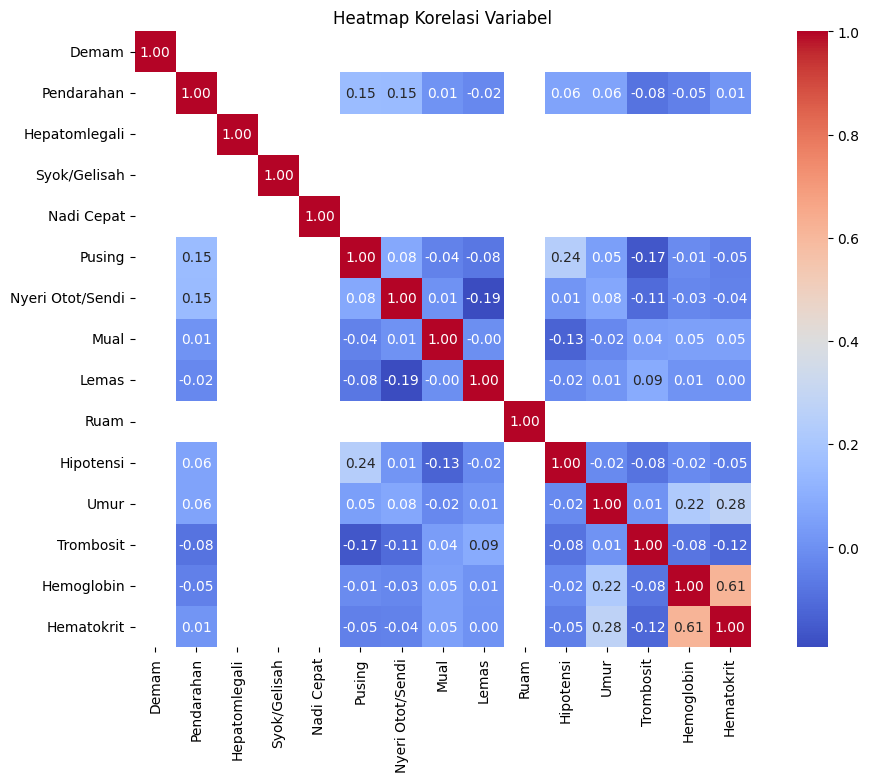

In [7]:
for col in filtered_df.columns:
    filtered_df[col] = filtered_df[col].replace({'ya': 1, 'tidak': 0, ' ': 0})

# Ensure all columns are of numeric type
filtered_df = filtered_df.apply(pd.to_numeric, errors='coerce')

# Hitung korelasi antar semua fitur
korelasi = filtered_df.corr(method = "kendall")

# Tampilkan tabel korelasi
print(korelasi)

# Visualisasi korelasi dalam bentuk heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(korelasi, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Heatmap Korelasi Variabel')
plt.show()


- Jika menunjukkan nilai mendekati +1 ( artinya memiliki hubungan positif) dan -1 (artinya memiliki hubungan negatif).
- Warna merah menunjukkan terdapat korelasi tinggi dan warna biru menunjukkan korelasi rendah.
- Jika angka mendekati 0 maka tidak terdapat korelasi.

Fitur Yang Digunakan
- Pada fitur hemoglobin dan hematokrit terdapat korelasi sebesar 0.35 yang menunjukkan adanya korelasi kuat positif.
- Fitur umur dan hematokrit terdapat korelasi sebesar 0.24 menunjukkan adanya korelasi positif berupa semakin tinggi umur, maka hematokrit akan naik.
-Fitur hipotensi dan pusing sebesar 0.24 terdapat korelasi karena pasien dengan gejala hipotensi cenderung akan merasakan pusing.
-Trombosit - pusing dan trombosit - hematokrit memiliki korelasi llemah negatif artinya makin rendah trombosit maka pusing dan hematokrit berpengaruh.
-Fitur pusing, pendarahan dan Nyeri Otot/Sendi memiliki korelasi kecil sebesar 0.15, tapi tetap digunakan karena merupakan gejala klinis penting untuk mendeteksi tingkat keparahan gejala pasien.



#Preprocessing Data

##Cleaning

In [8]:
df_int.head()

,NO,ID,NAMA,Umur,Jenis Kelamin,Demam,Pendarahan,Hepatomlegali,Syok/Gelisah,Nadi Cepat,Pusing,Nyeri Otot/Sendi,Mual,Lemas,Ruam,Hipotensi,Trombosit,Hemoglobin,Hematokrit,Diagnosa
0,1,255682.0,Muhamad Agus Zakki,20,Laki-Laki,1,0,0,0,0,0,0,1,1,0,0,156000,17.0,46.5,DBD
1,2,343976.0,Panji Apriyanto,23,Laki-Laki,1,0,0,0,0,0,0,1,1,0,0,34000,16.0,44.3,DBD
2,3,344246.0,Rika Amelia,13,Perempuan,1,0,0,0,0,0,0,1,1,0,0,82000,13.1,38.5,DBD
3,4,326639.0,Nabil Marwan Falih,15,Laki-Laki,1,0,0,0,0,1,0,1,1,0,0,109000,16.0,45.8,DBD
4,5,365465.0,Muhammad Syamsul Hadi,14,Laki-Laki,1,0,0,0,0,0,0,1,1,0,0,34000,14.4,40.8,DBD


In [9]:
#tampilkan informasi data
df_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NO                801 non-null    int64  
 1   ID                637 non-null    float64
 2   NAMA              801 non-null    object 
 3   Umur              801 non-null    int64  
 4   Jenis Kelamin     801 non-null    object 
 5   Demam             801 non-null    int64  
 6   Pendarahan        801 non-null    int64  
 7   Hepatomlegali     801 non-null    int64  
 8   Syok/Gelisah      801 non-null    int64  
 9   Nadi Cepat        801 non-null    int64  
 10  Pusing            801 non-null    int64  
 11  Nyeri Otot/Sendi  801 non-null    int64  
 12  Mual              801 non-null    int64  
 13  Lemas             801 non-null    int64  
 14  Ruam              801 non-null    int64  
 15  Hipotensi         801 non-null    int64  
 16  Trombosit         801 non-null    int64  
 1

In [10]:
#cek duplikat
df_int.duplicated().sum()

np.int64(0)

In [11]:
#Drop fitur yang tidak digunakan
fitur_dibuang = ['iD', 'NAMA', 'Hepatomlegali', 'Syok/Gelisah', 'Nadi Cepat','Ruam'] # Replace 'ID' with 'NO'
df_int = df_int.drop(columns=fitur_dibuang, errors='ignore') # Add errors='ignore' to skip non-existent columns

print(df_int.columns)

Index(['NO', 'ID', 'Umur', 'Jenis Kelamin', 'Demam', 'Pendarahan', 'Pusing',
       'Nyeri Otot/Sendi', 'Mual', 'Lemas', 'Hipotensi', 'Trombosit',
       'Hemoglobin', 'Hematokrit', 'Diagnosa'],
      dtype='object')


In [12]:
#tampilkan informasi data yang telah terfilter
df_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NO                801 non-null    int64  
 1   ID                637 non-null    float64
 2   Umur              801 non-null    int64  
 3   Jenis Kelamin     801 non-null    object 
 4   Demam             801 non-null    int64  
 5   Pendarahan        801 non-null    int64  
 6   Pusing            801 non-null    int64  
 7   Nyeri Otot/Sendi  801 non-null    int64  
 8   Mual              801 non-null    int64  
 9   Lemas             801 non-null    int64  
 10  Hipotensi         801 non-null    int64  
 11  Trombosit         801 non-null    int64  
 12  Hemoglobin        797 non-null    float64
 13  Hematokrit        800 non-null    float64
 14  Diagnosa          801 non-null    object 
dtypes: float64(3), int64(10), object(2)
memory usage: 94.0+ KB


In [13]:
# Ubah huruf kecil/besar jadi konsisten
# Check if the column exists before proceeding
if 'Jenis Kelamin' in df_int.columns:
    df_int['Jenis Kelamin'] = df_int['Jenis Kelamin'].str.lower().str.strip()

    # Ganti nilai kategori
    df_int['Jenis Kelamin'] = df_int['Jenis Kelamin'].replace({
        'Perempuan':'P',
        'perempuan': 'P',
        'Laki-Laki':'L',
        'laki-laki': 'L'
    })
    print(df_int['Jenis Kelamin'].unique())
else:
    print("Column 'jenis kelamin' not found in DataFrame.")

['L' 'P']


In [14]:
df_int.head()

,NO,ID,Umur,Jenis Kelamin,Demam,Pendarahan,Pusing,Nyeri Otot/Sendi,Mual,Lemas,Hipotensi,Trombosit,Hemoglobin,Hematokrit,Diagnosa
0,1,255682.0,20,L,1,0,0,0,1,1,0,156000,17.0,46.5,DBD
1,2,343976.0,23,L,1,0,0,0,1,1,0,34000,16.0,44.3,DBD
2,3,344246.0,13,P,1,0,0,0,1,1,0,82000,13.1,38.5,DBD
3,4,326639.0,15,L,1,0,1,0,1,1,0,109000,16.0,45.8,DBD
4,5,365465.0,14,L,1,0,0,0,1,1,0,34000,14.4,40.8,DBD


In [15]:
# Bersihkan kolom Umur dari string " Tahun" dan ubah ke float
df_int['Umur'] = df_int['Umur'].astype(str).str.replace("Tahun", "", regex=False).str.strip()
df_int['Umur'] = df_int['Umur'].astype(float)


In [16]:
print(df_int['Umur'].unique())

[20. 23. 13. 15. 14. 17. 59. 12.  8. 16. 10. 11.  2.  3.  4.  5.  9.  7.
  6.  1. 19. 55. 21. 25. 44. 18. 43. 22. 46. 28. 50. 26. 29. 54. 32. 31.
 35. 61. 70. 39. 30. 27. 41. 38. 33. 24. 56. 40. 36. 45. 53. 34. 47. 52.
 37.]


##Missing Values

In [17]:
#cek missing value
df_int.isnull().sum()

,0
NO,0
ID,164
Umur,0
Jenis Kelamin,0
Demam,0
Pendarahan,0
Pusing,0
Nyeri Otot/Sendi,0
Mual,0
Lemas,0


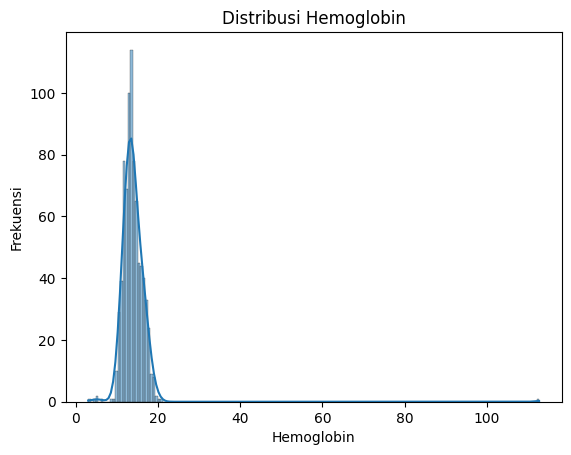

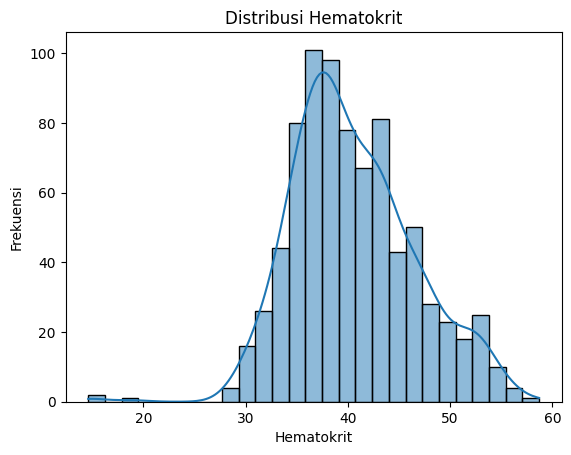

In [18]:
#cek distribusi data
sns.histplot(df['Hemoglobin'], kde=True)
plt.title('Distribusi Hemoglobin')
plt.xlabel('Hemoglobin')
plt.ylabel('Frekuensi')
plt.show()

sns.histplot(df['Hematokrit'], kde=True)
plt.title('Distribusi Hematokrit')
plt.xlabel('Hematokrit')
plt.ylabel('Frekuensi')
plt.show()


In [19]:
#Lengkapi Data Kosong
df_int.fillna({
    'Hemoglobin': df_int['Hemoglobin'].median(),
    'Hematokrit': df_int['Hematokrit'].mean()
}, inplace=True)


In [20]:
print(df_int[['Hemoglobin', 'Hematokrit']].isnull().sum())


Hemoglobin    0
Hematokrit    0
dtype: int64


In [21]:
df_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NO                801 non-null    int64  
 1   ID                637 non-null    float64
 2   Umur              801 non-null    float64
 3   Jenis Kelamin     801 non-null    object 
 4   Demam             801 non-null    int64  
 5   Pendarahan        801 non-null    int64  
 6   Pusing            801 non-null    int64  
 7   Nyeri Otot/Sendi  801 non-null    int64  
 8   Mual              801 non-null    int64  
 9   Lemas             801 non-null    int64  
 10  Hipotensi         801 non-null    int64  
 11  Trombosit         801 non-null    int64  
 12  Hemoglobin        801 non-null    float64
 13  Hematokrit        801 non-null    float64
 14  Diagnosa          801 non-null    object 
dtypes: float64(4), int64(9), object(2)
memory usage: 94.0+ KB


##Outlier

In [22]:
# 1. Ambil semua kolom numerik
numerik_cols = df_int.select_dtypes(include=['float64', 'int64']).columns

# 2. Fungsi deteksi outlier berdasarkan IQR
def detect_outliers_iqr(df_int, col):
    # CHANGE: Use the same DataFrame (df) for quantile calculation
    Q1 = df_int[col].quantile(0.25)
    Q3 = df_int[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df_int[(df_int[col] < lower) | (df_int[col] > upper)]
    return outliers

# 3. Cek outlier untuk semua kolom numerik
# CHANGE: Use df consistently, assuming df is your cleaned DataFrame
for col in numerik_cols:
    outliers = detect_outliers_iqr(df_int, col)  # Pass 'df' instead of 'df_clean'
    print(f'{col} → Jumlah outlier: {len(outliers)}')

NO → Jumlah outlier: 0
ID → Jumlah outlier: 26
Umur → Jumlah outlier: 58
Demam → Jumlah outlier: 0
Pendarahan → Jumlah outlier: 47
Pusing → Jumlah outlier: 0
Nyeri Otot/Sendi → Jumlah outlier: 23
Mual → Jumlah outlier: 1
Lemas → Jumlah outlier: 9
Hipotensi → Jumlah outlier: 54
Trombosit → Jumlah outlier: 14
Hemoglobin → Jumlah outlier: 12
Hematokrit → Jumlah outlier: 8


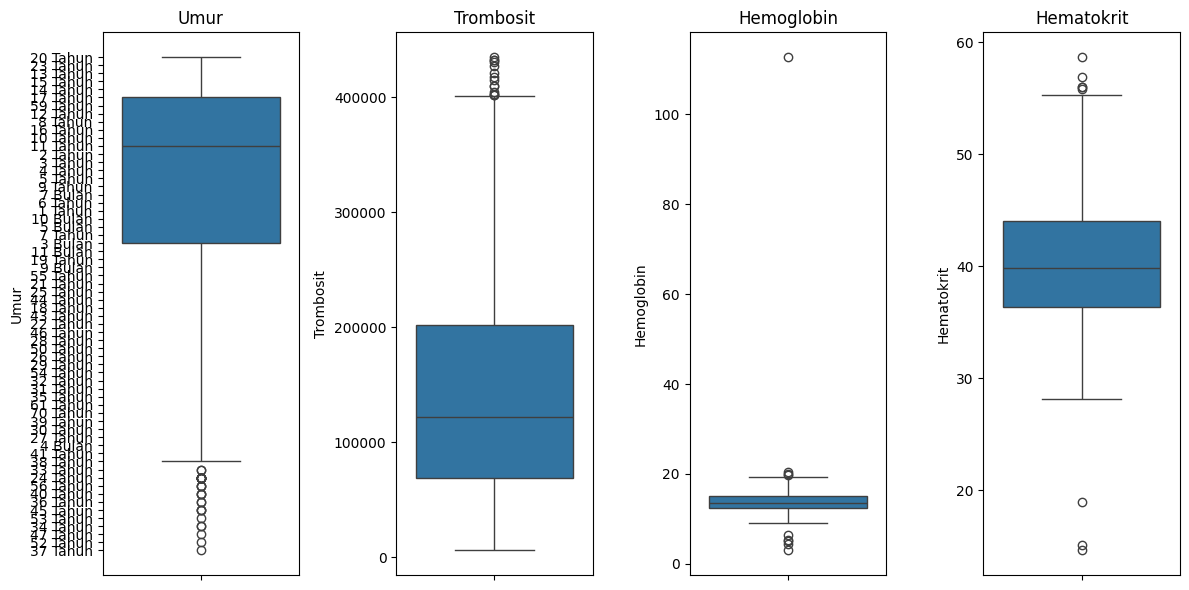

In [23]:
# Atur ukuran figure
plt.figure(figsize=(12, 6))

# Define fitur_numerik here
fitur_numerik = ['Umur', 'Trombosit', 'Hemoglobin', 'Hematokrit'] # Assuming these are your numerical features

# Loop fitur dan buat boxplot
for i, col in enumerate(fitur_numerik, 1):
    plt.subplot(1, len(fitur_numerik), i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [24]:
#Penanganan Outlier bilangan numerik
def winsorize_outliers(df_int, column):
    Q1 = df_int[column].quantile(0.25)
    Q3 = df_int[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Ganti outlier dengan batas bawah/atas
    df_int[column] = np.where(df_int[column] > upper_bound, upper_bound, df_int[column])
    return df

# Define the function to detect outliers.
def hitung_outlier_IQR(column):
    # Calculate quantiles and IQR
    Q1 = df_int[column].quantile(0.25)
    Q3 = df_int[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = df_int[(df_int[column] < lower_bound) | (df_int[column] > upper_bound)]

    # Return the number of outliers
    return len(outliers)

print("Outlier Umur:", hitung_outlier_IQR('Umur'))
print("Outlier Hemoglobin:", hitung_outlier_IQR('Hemoglobin'))
print("Outlier Hematokrit:", hitung_outlier_IQR('Hematokrit'))
print("Outlier Trombvosit:", hitung_outlier_IQR('Trombosit'))


Outlier Umur: 58
Outlier Hemoglobin: 12
Outlier Hematokrit: 8
Outlier Trombvosit: 14


In [25]:
def ganti_outlier(df_int, kolom):
    Q1 = df_int[kolom].quantile(0.25)
    Q3 = df_int[kolom].quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR
    df_int[kolom] = df_int[kolom].apply(lambda x: batas_bawah if x < batas_bawah else (batas_atas if x > batas_atas else x))
    return df_int

for kol in ['Umur','Hemoglobin', 'Hematokrit', 'Trombosit']:
    df_int = ganti_outlier(df_int, kol)


In [26]:
print("Outlier Umur:", hitung_outlier_IQR('Umur'))
print("Outlier Hematokrit:", hitung_outlier_IQR('Hematokrit'))
print("Outlier Trombosit:", hitung_outlier_IQR('Trombosit'))

Outlier Umur: 0
Outlier Hematokrit: 0
Outlier Trombosit: 0


In [27]:
# Menampilkan 10 baris pertama data setelah outlier ditangani
df_int[['Umur','Trombosit', 'Hemoglobin', 'Hematokrit']].head() # Changed from tuple to list

,Umur,Trombosit,Hemoglobin,Hematokrit
0,20.0,156000.0,17.0,46.5
1,23.0,34000.0,16.0,44.3
2,13.0,82000.0,13.1,38.5
3,15.0,109000.0,16.0,45.8
4,14.0,34000.0,14.4,40.8


In [28]:
df_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NO                801 non-null    int64  
 1   ID                637 non-null    float64
 2   Umur              801 non-null    float64
 3   Jenis Kelamin     801 non-null    object 
 4   Demam             801 non-null    int64  
 5   Pendarahan        801 non-null    int64  
 6   Pusing            801 non-null    int64  
 7   Nyeri Otot/Sendi  801 non-null    int64  
 8   Mual              801 non-null    int64  
 9   Lemas             801 non-null    int64  
 10  Hipotensi         801 non-null    int64  
 11  Trombosit         801 non-null    float64
 12  Hemoglobin        801 non-null    float64
 13  Hematokrit        801 non-null    float64
 14  Diagnosa          801 non-null    object 
dtypes: float64(5), int64(8), object(2)
memory usage: 94.0+ KB


###Cek distribusi Fitur Biner

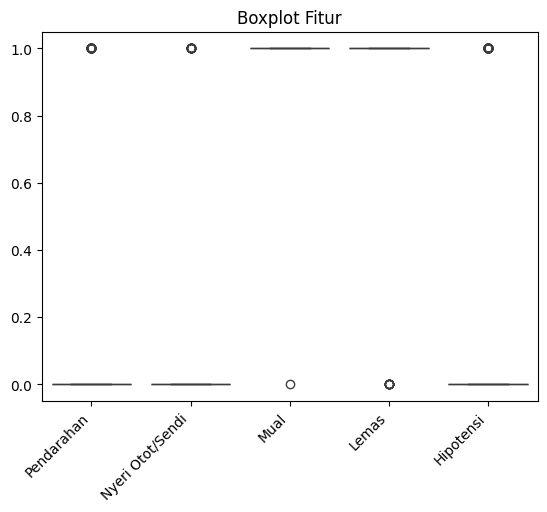

In [29]:
# Cek distribusi fitur biner terkena outlier
sns.boxplot(data=df_int[['Pendarahan','Nyeri Otot/Sendi','Mual','Lemas','Hipotensi']]) # Corrected line
plt.title("Boxplot Fitur")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [30]:
# Langkah 1: Cek nilai yang tidak valid dalam fitur biner (nilai selain 0 atau 1)
# CHANGE: Use .applymap() to check for values in [0, 1] for each cell
invalid_values = df_int[['Pendarahan','Nyeri Otot/Sendi','Mual','Lemas','Hipotensi']].applymap(lambda x: x not in [0, 1, 0.0, 1.0])
print("Nilai yang tidak valid dalam fitur biner:")
print(invalid_values)

Nilai yang tidak valid dalam fitur biner:
     Pendarahan  Nyeri Otot/Sendi   Mual  Lemas  Hipotensi
0         False             False  False  False      False
1         False             False  False  False      False
2         False             False  False  False      False
3         False             False  False  False      False
4         False             False  False  False      False
..          ...               ...    ...    ...        ...
796       False             False  False  False      False
797       False             False  False  False      False
798       False             False  False  False      False
799       False             False  False  False      False
800       False             False  False  False      False

[801 rows x 5 columns]


<ipython-input-30-6e91bb58ec0c>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  invalid_values = df_int[['Pendarahan','Nyeri Otot/Sendi','Mual','Lemas','Hipotensi']].applymap(lambda x: x not in [0, 1, 0.0, 1.0])


In [31]:
# Langkah 2: Cek distribusi fitur biner (frekuensi nilai 0 dan 1)
distribution = df_int[['Pendarahan','Nyeri Otot/Sendi','Mual','Lemas','Hipotensi']].value_counts()
print("\nDistribusi nilai fitur biner (setelah pembersihan):")
print(distribution)


Distribusi nilai fitur biner (setelah pembersihan):
Pendarahan  Nyeri Otot/Sendi  Mual  Lemas  Hipotensi
0           0                 1     1      0            686
                                           1             44
1           0                 1     1      0             35
0           1                 1     1      0             13
1           0                 1     1      1              6
            1                 1     1      0              5
0           0                 1     0      0              5
            1                 1     0      0              2
                                    1      1              2
            0                 0     1      1              1
                              1     0      1              1
1           1                 1     0      0              1
Name: count, dtype: int64


In [32]:
# Langkah 3: Jika terdapat nilai hilang, imputasi dengan modus (nilai yang paling sering muncul)
# Mengimputasi nilai hilang dengan modus fitur_biner
# CHANGE: Use iloc[0] instead of [0] and apply to each column individually
for col in ['Pendarahan', 'Nyeri Otot/Sendi', 'Mual', 'Lemas', 'Hipotensi']:
    mode_value = df_int[col].mode().iloc[0] if not df_int[col].mode().empty else 0 # Get mode, handle empty case
    df_int[col].fillna(mode_value, inplace=True)
print("\nData setelah imputasi nilai hilang dengan modus:")


Data setelah imputasi nilai hilang dengan modus:


<ipython-input-32-a47e2238b23f>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_int[col].fillna(mode_value, inplace=True)
<ipython-input-32-a47e2238b23f>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [33]:
# Function to detect and print outliers using IQR
def detect_and_print_outliers(df_int, column):
    Q1 = df_int[column].quantile(0.25)
    Q3 = df_int[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_int[(df_int[column] < lower_bound) | (df_int[column] > upper_bound)]
    print(f"Outliers in {column}:")
    print(outliers)

# Apply the function to your desired columns
for column in ['Pendarahan', 'Nyeri Otot/Sendi', 'Mual', 'Lemas', 'Hipotensi']:
    detect_and_print_outliers(df_int, column)

Outliers in Pendarahan:
      NO        ID  Umur Jenis Kelamin  Demam  Pendarahan  Pusing  \
389  390  368485.0  14.0             L      1           1       0   
390  391  357521.0  12.0             L      1           1       1   
391  392  346184.0   2.0             P      1           1       0   
392  393  396624.0  15.0             L      1           1       0   
397  398  382689.0  10.0             P      1           1       1   
398  399  325384.0  21.0             L      1           1       1   
399  400  479232.0  12.0             P      1           1       1   
400  401  473537.0   7.0             P      1           1       1   
401  402  417292.0  12.0             L      1           1       1   
402  403  486219.0  34.0             L      1           1       1   
403  404  441283.0  26.0             P      1           1       1   
404  405  498623.0  19.0             L      1           1       1   
405  406  486321.0  29.0             P      1           1       1   
406  407  

In [34]:
df_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NO                801 non-null    int64  
 1   ID                637 non-null    float64
 2   Umur              801 non-null    float64
 3   Jenis Kelamin     801 non-null    object 
 4   Demam             801 non-null    int64  
 5   Pendarahan        801 non-null    int64  
 6   Pusing            801 non-null    int64  
 7   Nyeri Otot/Sendi  801 non-null    int64  
 8   Mual              801 non-null    int64  
 9   Lemas             801 non-null    int64  
 10  Hipotensi         801 non-null    int64  
 11  Trombosit         801 non-null    float64
 12  Hemoglobin        801 non-null    float64
 13  Hematokrit        801 non-null    float64
 14  Diagnosa          801 non-null    object 
dtypes: float64(5), int64(8), object(2)
memory usage: 94.0+ KB


In [35]:
# Deteksi outlier hanya dengan melihat nilai unik
#CHANGE: Assign binary_cols with the desired columns
binary_cols = ['Pendarahan', 'Nyeri Otot/Sendi', 'Mual', 'Lemas', 'Hipotensi']
for col in binary_cols:
    if not set(df_int[col].unique()).issubset({0, 1}):
        print(f"{col} ➤ Ada nilai di luar 0 dan 1!")
    else:
        print(f"{col} ➤ Aman ✅ (hanya 0 dan 1)")

Pendarahan ➤ Aman ✅ (hanya 0 dan 1)
Nyeri Otot/Sendi ➤ Aman ✅ (hanya 0 dan 1)
Mual ➤ Aman ✅ (hanya 0 dan 1)
Lemas ➤ Aman ✅ (hanya 0 dan 1)
Hipotensi ➤ Aman ✅ (hanya 0 dan 1)


In [36]:
df_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NO                801 non-null    int64  
 1   ID                637 non-null    float64
 2   Umur              801 non-null    float64
 3   Jenis Kelamin     801 non-null    object 
 4   Demam             801 non-null    int64  
 5   Pendarahan        801 non-null    int64  
 6   Pusing            801 non-null    int64  
 7   Nyeri Otot/Sendi  801 non-null    int64  
 8   Mual              801 non-null    int64  
 9   Lemas             801 non-null    int64  
 10  Hipotensi         801 non-null    int64  
 11  Trombosit         801 non-null    float64
 12  Hemoglobin        801 non-null    float64
 13  Hematokrit        801 non-null    float64
 14  Diagnosa          801 non-null    object 
dtypes: float64(5), int64(8), object(2)
memory usage: 94.0+ KB


In [37]:
print(df_int['Diagnosa'].value_counts())

Diagnosa
DBD    432
DD     269
DSS    100
Name: count, dtype: int64


In [38]:
df_final=df_int.copy()

##Kategorikal Data

In [39]:
# Display the DataFrame's content:
df_final.head() # To show the first few rows
# or
display(df_final)

# Fungsi kategori trombosit
def kategori_trombosit(x):
    if x < 100000:
        return 1  # Rendah
    elif x <= 150000:
        return 2  # Sedang
    else:
        return 3  # Tinggi

# Fungsi kategori Hb
def kategori_hemoglobin(x):
    if x < 12:
        return 1  # Rendah
    elif x <= 16.9:
        return 2  # Sedang
    else:
        return 3  # Tinggi

# Fungsi kategori Ht
def kategori_hematokrit(x):
    if x < 35:
        return 1  # Rendah
    elif x <= 49.9:
        return 2  # Sedang
    else:
        return 3  # Tinggi

# Terapkan ke DataFrame
df_final['Trombosit_Kat'] = df_final['Trombosit'].apply(kategori_trombosit)
df_final['Hemoglobin_Kat'] = df_final['Hemoglobin'].apply(kategori_hemoglobin)
df_final['Hematokrit_Kat'] = df_final['Hematokrit'].apply(kategori_hematokrit)

# Lihat hasil
print(df_final)


,NO,ID,Umur,Jenis Kelamin,Demam,Pendarahan,Pusing,Nyeri Otot/Sendi,Mual,Lemas,Hipotensi,Trombosit,Hemoglobin,Hematokrit,Diagnosa
0,1,255682.0,20.0,L,1,0,0,0,1,1,0,156000.0,17.0,46.5,DBD
1,2,343976.0,23.0,L,1,0,0,0,1,1,0,34000.0,16.0,44.3,DBD
2,3,344246.0,13.0,P,1,0,0,0,1,1,0,82000.0,13.1,38.5,DBD
3,4,326639.0,15.0,L,1,0,1,0,1,1,0,109000.0,16.0,45.8,DBD
4,5,365465.0,14.0,L,1,0,0,0,1,1,0,34000.0,14.4,40.8,DBD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,797,397160.0,25.0,L,1,0,1,0,1,1,0,72000.0,11.8,51.3,DSS
797,798,302790.0,19.0,L,1,0,0,0,1,1,0,38000.0,17.9,54.2,DSS
798,799,398611.0,10.0,L,1,0,0,0,1,1,0,61000.0,11.0,50.0,DSS
799,800,317739.0,16.0,L,1,0,0,0,1,1,0,235000.0,12.6,42.0,DD


      NO        ID  Umur Jenis Kelamin  Demam  Pendarahan  Pusing  \
0      1  255682.0  20.0             L      1           0       0   
1      2  343976.0  23.0             L      1           0       0   
2      3  344246.0  13.0             P      1           0       0   
3      4  326639.0  15.0             L      1           0       1   
4      5  365465.0  14.0             L      1           0       0   
..   ...       ...   ...           ...    ...         ...     ...   
796  797  397160.0  25.0             L      1           0       1   
797  798  302790.0  19.0             L      1           0       0   
798  799  398611.0  10.0             L      1           0       0   
799  800  317739.0  16.0             L      1           0       0   
800  801  396198.0  13.0             L      1           0       0   

     Nyeri Otot/Sendi  Mual  Lemas  Hipotensi  Trombosit  Hemoglobin  \
0                   0     1      1          0   156000.0        17.0   
1                   0     1

In [40]:
df_final['Jenis Kelamin'] = df_final['Jenis Kelamin'].map({'L': 1, 'P': 2})

In [41]:
print(df_final)

      NO        ID  Umur  Jenis Kelamin  Demam  Pendarahan  Pusing  \
0      1  255682.0  20.0              1      1           0       0   
1      2  343976.0  23.0              1      1           0       0   
2      3  344246.0  13.0              2      1           0       0   
3      4  326639.0  15.0              1      1           0       1   
4      5  365465.0  14.0              1      1           0       0   
..   ...       ...   ...            ...    ...         ...     ...   
796  797  397160.0  25.0              1      1           0       1   
797  798  302790.0  19.0              1      1           0       0   
798  799  398611.0  10.0              1      1           0       0   
799  800  317739.0  16.0              1      1           0       0   
800  801  396198.0  13.0              1      1           0       0   

     Nyeri Otot/Sendi  Mual  Lemas  Hipotensi  Trombosit  Hemoglobin  \
0                   0     1      1          0   156000.0        17.0   
1              

In [71]:
label_map = {'L': 1,'P':2}
df_final['Jenis_kelamin'] = df_final['Jenis Kelamin'].map(label_map)
print(df_final['Jenis_kelamin'].value_counts()) # Changed from 'Jenis_Kelamin' to 'Jenis_kelamin'

Series([], Name: count, dtype: int64)


In [43]:
label_map = {'DD': 1,'dd':1, 'DBD': 2,'dbd':2, 'DSS': 3,'dss':3}
df_final['Label'] = df_final['Diagnosa'].map(label_map)

In [44]:
print(df_final['Label'].value_counts())

Label
2    432
1    269
3    100
Name: count, dtype: int64


In [78]:
# Menampilkan semua kolom dan jumlah nilai NaN
print(df_final.isnull().sum())


NO                  0
Umur                0
Jenis Kelamin       0
Demam               0
Pendarahan          0
Pusing              0
Nyeri Otot/Sendi    0
Trombosit           0
Hemoglobin          0
Hematokrit          0
Diagnosa            0
Trombosit_Kat       0
Hemoglobin_Kat      0
Hematokrit_Kat      0
Label               0
dtype: int64


#Model RFE

In [45]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

# Exclude non-numeric columns from X
# Remove the columns that caused the error from the drop list
existing_cols_to_drop = [col for col in ['Demam', 'Pendarahan', 'Pusing', 'Nyeri Otot/Sendi', 'Mual',
                                         'Lemas', 'Hipotensi', 'Trombosit', 'Hemoglobin', 'Hematokrit',
                                         'NO', 'ID', 'Jenis Kelamin', 'Nama'] if col in df_final.columns]
X = df_final.drop(columns=existing_cols_to_drop, axis=1)

# Use double brackets to select multiple columns for y
y = df_final['Diagnosa']

for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Impute or remove NaNs before scaling
# CHANGE: Use SimpleImputer to handle NaNs
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') # or strategy='median', etc.
X = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Model dasar untuk RFE
model = SVC(kernel='rbf')

# Seleksi fitur dengan RFE
rfe = RFE(estimator=model, n_features_to_select=5)
X_rfe = rfe.fit_transform(X, y)


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Diagnosa' 'Jenis_kelamin']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [46]:
#Insisialisasi Model SCVM+RFE (untuk proses filtering)
svm_model = SVC(kernel="rbf")  # Kernel linear cocok untuk RFE

rfe = RFE(estimator=svm_model, n_features_to_select=10)  # Pilih 10 fitur terbaik
# CHANGE: Fit using the scaled and imputed data
rfe.fit(X_scaled, y)  # Latih RFE pakai data

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=5. There will be no feature selection and all features will be kept.
  warnings.warn(


RFE(estimator=SVC(), n_features_to_select=10)

In [47]:
selected_features_indices = rfe.support_

# Assuming original_feature_names contains the names of features before scaling:
original_feature_names = ['Demam', 'Pendarahan', 'Pusing', 'Nyeri Otot/Sendi', 'Mual',
                          'Lemas', 'Hipotensi', 'Trombosit', 'Hemoglobin', 'Hematokrit']
# CHANGE: Fix the list comprehension to iterate only over the length of selected_features_indices
selected_features = [original_feature_names[i] for i, is_selected in enumerate(selected_features_indices) if is_selected]

ranking = rfe.ranking_

print("Fitur terpilih:")
print(selected_features)

print("\nRanking semua fitur:")
# CHANGE: Iterate through original_feature_names, not X.columns
for col, rank in zip(original_feature_names, ranking):
    print(f"{col}: {rank}")

Fitur terpilih:
['Demam', 'Pendarahan', 'Pusing', 'Nyeri Otot/Sendi', 'Mual']

Ranking semua fitur:
Demam: 1
Pendarahan: 1
Pusing: 1
Nyeri Otot/Sendi: 1
Mual: 1


In [48]:
#Fitur yang dibuang
#Drop fitur yang tidak digunakan
# Check if columns exist before dropping
fitur_dibuang = ['ID', 'NAMA', 'Mual', 'Lemas', 'Hipotensi']
existing_cols_to_drop = [col for col in fitur_dibuang if col in df_final.columns]

# Drop only existing columns with errors='ignore' to prevent errors
df_final = df_final.drop(columns=existing_cols_to_drop, errors='ignore')

print(df_final.columns)

Index(['NO', 'Umur', 'Jenis Kelamin', 'Demam', 'Pendarahan', 'Pusing',
       'Nyeri Otot/Sendi', 'Trombosit', 'Hemoglobin', 'Hematokrit', 'Diagnosa',
       'Trombosit_Kat', 'Hemoglobin_Kat', 'Hematokrit_Kat', 'Jenis_kelamin',
       'Label'],
      dtype='object')


In [49]:
df_final.head()

,NO,Umur,Jenis Kelamin,Demam,Pendarahan,Pusing,Nyeri Otot/Sendi,Trombosit,Hemoglobin,Hematokrit,Diagnosa,Trombosit_Kat,Hemoglobin_Kat,Hematokrit_Kat,Jenis_kelamin,Label
0,1,20.0,1,1,0,0,0,156000.0,17.0,46.5,DBD,3,3,2,NaN,2
1,2,23.0,1,1,0,0,0,34000.0,16.0,44.3,DBD,1,2,2,NaN,2
2,3,13.0,2,1,0,0,0,82000.0,13.1,38.5,DBD,1,2,2,NaN,2
3,4,15.0,1,1,0,1,0,109000.0,16.0,45.8,DBD,2,2,2,NaN,2
4,5,14.0,1,1,0,0,0,34000.0,14.4,40.8,DBD,1,2,2,NaN,2


#Data Imbalance


In [50]:
#cek data per kelas
print(df_final['Diagnosa'].value_counts())

Diagnosa
DBD    432
DD     269
DSS    100
Name: count, dtype: int64


In [51]:
#hitung persentase per kelas
print(df_final['Diagnosa'].value_counts(normalize=True) * 100)

Diagnosa
DBD    53.932584
DD     33.583021
DSS    12.484395
Name: proportion, dtype: float64


persentase data DSS dibawah 20% sehingga terjadi data imbalance

In [52]:
#instalasi imbalanced
!pip install imbalanced-learn

In [53]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd
from sklearn.impute import SimpleImputer

# Pisahkan fitur dan label dari df_final
X = df_final.drop('Diagnosa', axis=1)
y = df_final['Diagnosa']

# Cek distribusi sebelum SMOTE
print("Distribusi sebelum SMOTE:", Counter(y))

# Ambil hanya kolom numerik
X_numeric = X.select_dtypes(include=['number'])

# Cek nilai NaN
print("\nCek jumlah NaN di setiap kolom numerik:")
print(X_numeric.isnull().sum())

# Drop kolom yang seluruh nilainya NaN
X_numeric = X_numeric.dropna(axis=1, how='all')

# Imputasi nilai hilang dengan mean
imputer = SimpleImputer(strategy='mean')
X_imputed_array = imputer.fit_transform(X_numeric)

# Ambil nama kolom hasil setelah drop NaN semua
imputed_feature_names = X_numeric.columns

# Buat DataFrame baru hasil imputasi
X_imputed_df = pd.DataFrame(X_imputed_array, columns=imputed_feature_names)

# Terapkan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_imputed_df, y)

# Buat DataFrame hasil resampling
X_res_df = pd.DataFrame(X_resampled, columns=X_imputed_df.columns)
y_res_df = pd.DataFrame(y_resampled, columns=['Diagnosa'])

# Gabungkan hasil akhir
df_resampled = pd.concat([X_res_df, y_res_df], axis=1)

# Cek distribusi setelah SMOTE
print("\nDistribusi setelah SMOTE:", Counter(df_resampled['Diagnosa']))


Distribusi sebelum SMOTE: Counter({'DBD': 432, 'DD': 269, 'DSS': 100})

Cek jumlah NaN di setiap kolom numerik:
NO                    0
Umur                  0
Jenis Kelamin         0
Demam                 0
Pendarahan            0
Pusing                0
Nyeri Otot/Sendi      0
Trombosit             0
Hemoglobin            0
Hematokrit            0
Trombosit_Kat         0
Hemoglobin_Kat        0
Hematokrit_Kat        0
Jenis_kelamin       801
Label                 0
dtype: int64

Distribusi setelah SMOTE: Counter({'DBD': 432, 'DD': 432, 'DSS': 432})


#Menyimpan File

#Menyimpan File

In [54]:
# menyimpan dataframe ke file csv
df_final.to_csv('data_clean.csv', index=False)

#Split Data

In [83]:
# ipython-input-119-5ecb6fde82e5
from sklearn.model_selection import train_test_split

X = df_final.drop(columns=['Label', 'Diagnosa'])  # Drop both 'Label' and 'Diagnosa' from features
y = df_final['Label']                 # Use the numeric 'Label' as the target

# Misal X (fitur) masih ada kolom kategori seperti 'Jenis Kelamin'
# Gunakan pd.get_dummies untuk ubah ke numerik one-hot
# Apply get_dummies to the feature data X before splitting
X_encoded = pd.get_dummies(X)


# Split data 80% train dan 20% test using the encoded features
x_train, x_test, y_train, y_test = train_test_split(
    X_encoded, y, # Use X_encoded for features
    test_size=0.2,         # 20% untuk testing
    random_state=42,       # Supaya hasil split selalu sama (optional tapi direkomendasikan)
    stratify=y             # Supaya proporsi kelas seimbang antara train dan test (penting untuk klasifikasi)
)

# Cek hasil
print(f"Jumlah data train: {len(x_train)}")
print(f"Jumlah data test: {len(x_test)}")
print(f"Kolom dalam x_train setelah one-hot encoding: {x_train.columns.tolist()}") # Print columns to verify

Jumlah data train: 640
Jumlah data test: 161
Kolom dalam x_train setelah one-hot encoding: ['NO', 'Umur', 'Jenis Kelamin', 'Demam', 'Pendarahan', 'Pusing', 'Nyeri Otot/Sendi', 'Trombosit', 'Hemoglobin', 'Hematokrit', 'Trombosit_Kat', 'Hemoglobin_Kat', 'Hematokrit_Kat']


#Model SVM Multiclass

In [84]:
!pip install scikit-learn
!pip install scikit-learn
from sklearn.svm import SVC
# Membuat objek/instance dengan nama model
model = SVC(gamma='scale')

In [85]:
#paramater tunning
from sklearn.model_selection import GridSearchCV
SVC(gamma='scale').get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [86]:
print(x_train.isnull().sum())  # Lihat kolom mana yang masih ada NaN
print(x_train.isnull().values.any())  # True kalau masih ada NaN


NO                  0
Umur                0
Jenis Kelamin       0
Demam               0
Pendarahan          0
Pusing              0
Nyeri Otot/Sendi    0
Trombosit           0
Hemoglobin          0
Hematokrit          0
Trombosit_Kat       0
Hemoglobin_Kat      0
Hematokrit_Kat      0
dtype: int64
False


In [87]:
from sklearn.model_selection import GridSearchCV # Import the necessary class
from sklearn.svm import SVC
param_grid = {'C':[0.01,0.1,1,10,100],
              'gamma':[100,10,1,0,1,0.01]}
#best model
best_model = GridSearchCV(SVC(),param_grid,cv=5,refit=True)
best_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [100, 10, 1, 0, 1, 0.01]})

In [89]:
# Model dengan parameter terbaik
best_model.best_estimator_

SVC(C=10, gamma=0.01)

##Data Training

In [91]:
# Fit preprocessor to the training data
fit_columns = [
    'NO', 'Umur', 'Demam', 'Pendarahan', 'Pusing', 'Nyeri Otot/Sendi',
    'Trombosit', 'Hemoglobin', 'Hematokrit',
    'Trombosit_Kat', 'Hemoglobin_Kat', 'Hematokrit_Kat'
]
scaler = StandardScaler()
scaler.fit(df_final[fit_columns])

StandardScaler()

In [92]:
# Before fitting the model:
# Exclude non-numeric columns from X
X_numeric = X.select_dtypes(include=['number']) # Select only numeric columns

# Impute or remove NaNs before scaling
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_numeric_imputed = imputer.fit_transform(X_numeric) # Impute NaNs in X_numeric, store as a new variable

# Print column names from the original DataFrame (X_numeric)
print("Fitur yang akan digunakan untuk training:", X_numeric.columns)
print("Shape of X before scaling:", X_numeric.shape)

# Scale only the numeric features in X for consistency:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric_imputed)  # Scale the imputed data

# Split data using the scaled features:
# Assuming 'y' is your target variable
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8, test_size=0.2)

# Fit the model using the complete set of scaled features:
best_model = GridSearchCV(SVC(), param_grid, cv=5, refit=True)
best_model.fit(x_train, y_train)

# ... (rest of your code) ...

print("Jumlah fitur saat pelatihan:", best_model.n_features_in_)

Fitur yang akan digunakan untuk training: Index(['NO', 'Umur', 'Jenis Kelamin', 'Demam', 'Pendarahan', 'Pusing',
       'Nyeri Otot/Sendi', 'Trombosit', 'Hemoglobin', 'Hematokrit',
       'Trombosit_Kat', 'Hemoglobin_Kat', 'Hematokrit_Kat'],
      dtype='object')
Shape of X before scaling: (801, 13)
Jumlah fitur saat pelatihan: 13


In [93]:
# DataFrame hasil prediksi training
# Create a new DataFrame with only the training data and its index
train_results = pd.DataFrame(index=y_train.index)

# Make predictions on the training data
y_train_pred_label = best_model.predict(x_train)

# Add the actual and predicted labels to the DataFrame
train_results['Asli'] = y_train
train_results['Prediksi'] = y_train_pred_label

print("Tabel Hasil Prediksi pada Data Training:")
display(train_results)

Tabel Hasil Prediksi pada Data Training:


,Asli,Prediksi
268,2,2
703,1,1
246,2,2
394,2,2
735,1,1
...,...,...
148,2,2
470,2,2
104,2,2
287,2,2


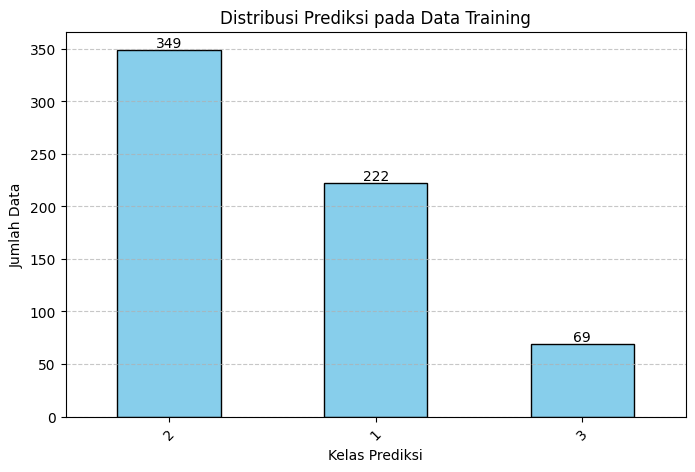

In [94]:
import matplotlib.pyplot as plt

# Hitung jumlah prediksi tiap kelas
prediksi_counts = train_results['Prediksi'].value_counts()

# Membuat bar chart
plt.figure(figsize=(8,5))
bars = prediksi_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Menambahkan nilai pada setiap batang
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.05,  # Posisi teks
             str(int(height)), ha='center', va='bottom', fontsize=10)  # Teks nilai

plt.title('Distribusi Prediksi pada Data Training')
plt.xlabel('Kelas Prediksi')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report # Import necessary functions

# Assuming 'best_model' is your trained model
prediction = best_model.predict(x_train) # Perform prediction and store in 'prediction'

accuracy = accuracy_score(y_train, prediction)
print(f"Accuracy: {accuracy}")



report = classification_report(y_train, prediction)
print("Classification Report:\n", report)

Accuracy: 0.9453125
Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.95      0.95       219
           2       0.94      0.96      0.95       340
           3       1.00      0.85      0.92        81

    accuracy                           0.95       640
   macro avg       0.96      0.92      0.94       640
weighted avg       0.95      0.95      0.95       640



##Data Testing

In [96]:
# DataFrame hasil prediksi testing
test_results = df_final.copy()

# Use the selected and preprocessed features for prediction:
y_test_pred = best_model.predict(x_test)

# Bikin DataFrame hasil prediksi
test_results = pd.DataFrame({
    'Asli': y_test,
    'Prediksi': y_test_pred
})

print("Tabel Hasil Prediksi pada Data Testing:")
display(test_results)

Tabel Hasil Prediksi pada Data Testing:


,Asli,Prediksi
43,2,2
207,2,2
695,1,1
632,1,1
11,1,2
...,...,...
659,1,1
562,3,3
480,2,3
21,2,2


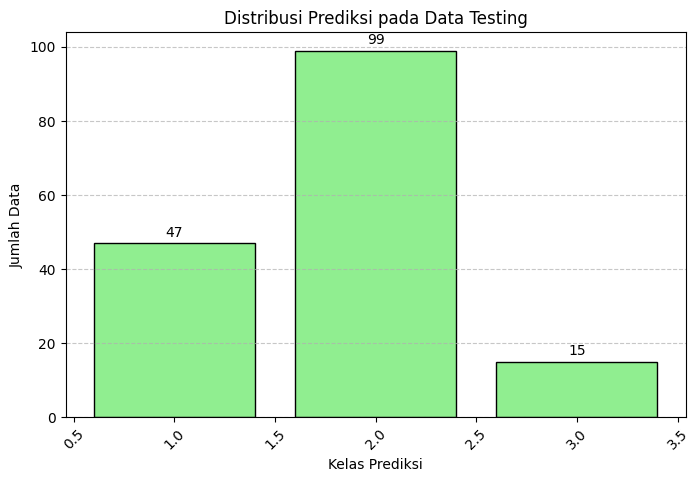

In [97]:
import matplotlib.pyplot as plt

# Hitung jumlah prediksi tiap kelas
prediksi_counts_test = test_results['Prediksi'].value_counts()

# Membuat bar chart
plt.figure(figsize=(8,5))
bars = plt.bar(prediksi_counts_test.index, prediksi_counts_test.values, color='lightgreen', edgecolor='black')

plt.title('Distribusi Prediksi pada Data Testing')
plt.xlabel('Kelas Prediksi')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan value di atas setiap batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom', fontsize=10)

plt.show()


#Uji Model

In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report # Import necessary functions

# Assuming 'best_model' is your trained model
prediction = best_model.predict(x_test) # Perform prediction and store in 'prediction'

accuracy = accuracy_score(y_test, prediction)
print(f"Accuracy: {accuracy}")



report = classification_report(y_test, prediction)
print("Classification Report:\n", report)

Accuracy: 0.9254658385093167
Classification Report:
               precision    recall  f1-score   support

           1       0.96      0.90      0.93        50
           2       0.91      0.98      0.94        92
           3       0.93      0.74      0.82        19

    accuracy                           0.93       161
   macro avg       0.93      0.87      0.90       161
weighted avg       0.93      0.93      0.92       161



In [99]:
import joblib

# Simpan model ke file .pkl
joblib.dump(best_model, 'model_svm.pkl')

# Menyimpan df_final ke file .pkl
joblib.dump(df_final, 'df_final.pkl')

['df_final.pkl']

#Sistem Prediksi

In [116]:
import pandas as pd # Import pandas
import joblib
from sklearn.preprocessing import StandardScaler

# === Load model dan data training ===
model = joblib.load('model_svm.pkl')
df_final = joblib.load('df_final.pkl')

# === Fungsi kategorisasi ===
def kategori_trombosit(x):
    if x < 150000:
        return 1  # Rendah
    elif x <= 450000:
        return 2  # Normal
    else:
        return 3  # Tinggi

def kategori_hemoglobin(x):
    if x < 13.5:
        return 1  # Rendah
    elif x <= 17.5:
        return 2  # Normal
    else:
        return 3  # Tinggi

def kategori_hematokrit(x):
    if x < 41:
        return 1  # Rendah
    elif x <= 50:
        return 2  # Normal
    else:
        return 3  # Tinggi

# Ensure 'Jenis_kelamin' column exists in df_final after loading
# This assumes 'Jenis Kelamin' (with space) exists and is encoded as L/P
# If not, you need to recreate or add the 'Jenis_kelamin' column here based on available data
if 'Jenis Kelamin' in df_final.columns and 'Jenis_kelamin' not in df_final.columns:
     label_map_gender = {'L': 1, 'P': 2, 'Laki-laki': 1, 'Perempuan': 2} # Use a specific map for gender if needed
     # Apply str.lower() and str.strip() for robustness if needed
     df_final['Jenis_kelamin'] = df_final['Jenis Kelamin'].apply(lambda x: label_map_gender.get(str(x).lower().strip(), -1)) # Map existing 'Jenis Kelamin' to 'Jenis_kelamin'

# === Kolom yang digunakan untuk prediksi ===
# Make sure 'Jenis_kelamin' is included in this list if you intend to use it
fit_columns = [
    'NO', 'Umur', 'Demam', 'Pendarahan', 'Pusing', 'Nyeri Otot/Sendi',
    'Trombosit', 'Hemoglobin', 'Hematokrit',
    'Trombosit_Kat', 'Hemoglobin_Kat', 'Hematokrit_Kat', 'Jenis_kelamin'
]

# Remove any columns from fit_columns that are NOT in df_final after loading
# This is a safer approach if df_final structure might vary slightly
actual_fit_columns = [col for col in fit_columns if col in df_final.columns]
print(f"Using these columns for scaling: {actual_fit_columns}")


# === Diagnosis map berdasarkan hasil prediksi ===
diagnosis_map = {1: "DD (Demam Dengue)", 2: "DBD (Demam Berdarah Dengue)", 3: "DSS (Sindrom Syok Dengue)"}

# === Fit StandardScaler berdasarkan data training ===
scaler = StandardScaler()
# Use the actual_fit_columns which are verified to exist in df_final
scaler.fit(df_final[actual_fit_columns])

# === Fungsi prediksi mandiri ===
def self_prediction():
    print("=== INPUT DATA PASIEN ===")
    try:
        No = int(input("No: "))
        Nama = input("Nama: ")  # Tidak digunakan untuk prediksi
        Umur = float(input("Umur: "))
        Jenis_Kelamin = input("Jenis Kelamin (Laki-laki/Perempuan): ").strip()

        Demam = 1 if input("Demam (YA/TIDAK): ").strip().lower() in ['ya', '1'] else 0
        Pendarahan = 1 if input("Pendarahan (YA/TIDAK): ").strip().lower() in ['ya', '1'] else 0
        Pusing = 1 if input("Pusing (YA/TIDAK): ").strip().lower() in ['ya', '1'] else 0
        Nyeri = 1 if input("Nyeri Otot/Sendi (YA/TIDAK): ").strip().lower() in ['ya', '1'] else 0

        Trombosit = float(input("Trombosit: "))
        Hemoglobin = float(input("Hemoglobin: ").replace(",", "."))
        Hematokrit = float(input("Hematokrit: ").replace(",", "."))

        # === Kategorisasi nilai numerik ===
        Trombosit_Kat = kategori_trombosit(Trombosit)
        Hemoglobin_Kat = kategori_hemoglobin(Hemoglobin)
        Hematokrit_Kat = kategori_hematokrit(Hematokrit)

        # === Encode jenis kelamin ===
        label_jenis_kelamin_input = {'laki-laki': 1, 'perempuan': 2} # Use lowercase for input matching
        Jenis_Kelamin_encoded = label_jenis_kelamin_input.get(Jenis_Kelamin.lower(), -1) # Ensure lowercase match

        # === Bangun DataFrame input ===
        # Make sure input_data columns match the columns used for scaler.fit
        input_data = pd.DataFrame([[
            No, Umur, Demam, Pendarahan, Pusing, Nyeri,
            Trombosit, Hemoglobin, Hematokrit,
            Trombosit_Kat, Hemoglobin_Kat, Hematokrit_Kat,
            Jenis_Kelamin_encoded # Include encoded gender
        ]], columns=fit_columns) # Use the full fit_columns list here initially

        # Select only the columns used for scaling from the input data
        input_data_scaled = input_data[actual_fit_columns]


        print("\n[DEBUG] Data sebelum scaling:")
        print(input_data_scaled)

        # === Cek NaN sebelum scaling ===
        if input_data_scaled.isnull().values.any():
            print("\n[ERROR] Terdapat nilai NaN pada input:")
            print(input_data_scaled.isnull())
            return

        # === Scaling dan prediksi ===
        # Use the subset of input data for scaling
        input_scaled = scaler.transform(input_data_scaled)
        prediction = model.predict(input_scaled)

        # Mapkan hasil prediksi ke diagnosis
        diagnosis = diagnosis_map.get(prediction[0], "Diagnosis tidak ditemukan")

        print("\n=== HASIL PREDIKSI ===")
        print(f"Nama: {Nama}")
        print(f"Prediksi: {diagnosis}")

    except Exception as e:
        print(f"\n[ERROR] Terjadi kesalahan input atau proses: {e}")

# === Jalankan fungsi ===
self_prediction()

Using these columns for scaling: ['NO', 'Umur', 'Demam', 'Pendarahan', 'Pusing', 'Nyeri Otot/Sendi', 'Trombosit', 'Hemoglobin', 'Hematokrit', 'Trombosit_Kat', 'Hemoglobin_Kat', 'Hematokrit_Kat', 'Jenis_kelamin']
=== INPUT DATA PASIEN ===
No: 201
Nama: Faynabila
Umur: 15
Jenis Kelamin (Laki-laki/Perempuan): Perempuan
Demam (YA/TIDAK): YA
Pendarahan (YA/TIDAK): TIDAK
Pusing (YA/TIDAK): YA
Nyeri Otot/Sendi (YA/TIDAK): YA
Trombosit: 155.000
Hemoglobin: 14.5
Hematokrit: 44.4

[DEBUG] Data sebelum scaling:
    NO  Umur  Demam  Pendarahan  Pusing  Nyeri Otot/Sendi  Trombosit  \
0  201  15.0      1           0       1                 1      155.0   

   Hemoglobin  Hematokrit  Trombosit_Kat  Hemoglobin_Kat  Hematokrit_Kat  \
0        14.5        44.4              1               2               2   

   Jenis_kelamin  
0              2  

=== HASIL PREDIKSI ===
Nama: Faynabila
Prediksi: DBD (Demam Berdarah Dengue)


#Simpan Model & Prediksi

In [117]:
import joblib

joblib.dump(model, 'model_svm.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(fit_columns, 'fit_columns.pkl')


['fit_columns.pkl']

In [118]:
%%writefile prediksi.py
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler

import pandas as pd # Import pandas
import joblib
from sklearn.preprocessing import StandardScaler

# === Load model dan data training ===
model = joblib.load('model_svm.pkl')
df_final = joblib.load('df_final.pkl')

# === Fungsi kategorisasi ===
def kategori_trombosit(x):
    if x < 150000:
        return 1  # Rendah
    elif x <= 450000:
        return 2  # Normal
    else:
        return 3  # Tinggi

def kategori_hemoglobin(x):
    if x < 13.5:
        return 1  # Rendah
    elif x <= 17.5:
        return 2  # Normal
    else:
        return 3  # Tinggi

def kategori_hematokrit(x):
    if x < 41:
        return 1  # Rendah
    elif x <= 50:
        return 2  # Normal
    else:
        return 3  # Tinggi

# Ensure 'Jenis_kelamin' column exists in df_final after loading
# This assumes 'Jenis Kelamin' (with space) exists and is encoded as L/P
# If not, you need to recreate or add the 'Jenis_kelamin' column here based on available data
if 'Jenis Kelamin' in df_final.columns and 'Jenis_kelamin' not in df_final.columns:
     label_map_gender = {'L': 1, 'P': 2, 'Laki-laki': 1, 'Perempuan': 2} # Use a specific map for gender if needed
     # Apply str.lower() and str.strip() for robustness if needed
     df_final['Jenis_kelamin'] = df_final['Jenis Kelamin'].apply(lambda x: label_map_gender.get(str(x).lower().strip(), -1)) # Map existing 'Jenis Kelamin' to 'Jenis_kelamin'

# === Kolom yang digunakan untuk prediksi ===
# Make sure 'Jenis_kelamin' is included in this list if you intend to use it
fit_columns = [
    'NO', 'Umur', 'Demam', 'Pendarahan', 'Pusing', 'Nyeri Otot/Sendi',
    'Trombosit', 'Hemoglobin', 'Hematokrit',
    'Trombosit_Kat', 'Hemoglobin_Kat', 'Hematokrit_Kat', 'Jenis_kelamin'
]

# Remove any columns from fit_columns that are NOT in df_final after loading
# This is a safer approach if df_final structure might vary slightly
actual_fit_columns = [col for col in fit_columns if col in df_final.columns]
print(f"Using these columns for scaling: {actual_fit_columns}")


# === Diagnosis map berdasarkan hasil prediksi ===
diagnosis_map = {1: "DD (Demam Dengue)", 2: "DBD (Demam Berdarah Dengue)", 3: "DSS (Sindrom Syok Dengue)"}

# === Fit StandardScaler berdasarkan data training ===
scaler = StandardScaler()
# Use the actual_fit_columns which are verified to exist in df_final
scaler.fit(df_final[actual_fit_columns])

# === Fungsi prediksi mandiri ===
def self_prediction():
    print("=== INPUT DATA PASIEN ===")
    try:
        No = int(input("No: "))
        Nama = input("Nama: ")  # Tidak digunakan untuk prediksi
        Umur = float(input("Umur: "))
        Jenis_Kelamin = input("Jenis Kelamin (Laki-laki/Perempuan): ").strip()

        Demam = 1 if input("Demam (YA/TIDAK): ").strip().lower() in ['ya', '1'] else 0
        Pendarahan = 1 if input("Pendarahan (YA/TIDAK): ").strip().lower() in ['ya', '1'] else 0
        Pusing = 1 if input("Pusing (YA/TIDAK): ").strip().lower() in ['ya', '1'] else 0
        Nyeri = 1 if input("Nyeri Otot/Sendi (YA/TIDAK): ").strip().lower() in ['ya', '1'] else 0

        Trombosit = float(input("Trombosit: "))
        Hemoglobin = float(input("Hemoglobin: ").replace(",", "."))
        Hematokrit = float(input("Hematokrit: ").replace(",", "."))

        # === Kategorisasi nilai numerik ===
        Trombosit_Kat = kategori_trombosit(Trombosit)
        Hemoglobin_Kat = kategori_hemoglobin(Hemoglobin)
        Hematokrit_Kat = kategori_hematokrit(Hematokrit)

        # === Encode jenis kelamin ===
        label_jenis_kelamin_input = {'laki-laki': 1, 'perempuan': 2} # Use lowercase for input matching
        Jenis_Kelamin_encoded = label_jenis_kelamin_input.get(Jenis_Kelamin.lower(), -1) # Ensure lowercase match

        # === Bangun DataFrame input ===
        # Make sure input_data columns match the columns used for scaler.fit
        input_data = pd.DataFrame([[
            No, Umur, Demam, Pendarahan, Pusing, Nyeri,
            Trombosit, Hemoglobin, Hematokrit,
            Trombosit_Kat, Hemoglobin_Kat, Hematokrit_Kat,
            Jenis_Kelamin_encoded # Include encoded gender
        ]], columns=fit_columns) # Use the full fit_columns list here initially

        # Select only the columns used for scaling from the input data
        input_data_scaled = input_data[actual_fit_columns]


        print("\n[DEBUG] Data sebelum scaling:")
        print(input_data_scaled)

        # === Cek NaN sebelum scaling ===
        if input_data_scaled.isnull().values.any():
            print("\n[ERROR] Terdapat nilai NaN pada input:")
            print(input_data_scaled.isnull())
            return

        # === Scaling dan prediksi ===
        # Use the subset of input data for scaling
        input_scaled = scaler.transform(input_data_scaled)
        prediction = model.predict(input_scaled)

        # Mapkan hasil prediksi ke diagnosis
        diagnosis = diagnosis_map.get(prediction[0], "Diagnosis tidak ditemukan")

        print("\n=== HASIL PREDIKSI ===")
        print(f"Nama: {Nama}")
        print(f"Prediksi: {diagnosis}")

    except Exception as e:
        print(f"\n[ERROR] Terjadi kesalahan input atau proses: {e}")
if __name__ == '__main__':
# === Jalankan fungsi ===
self_prediction()

Writing prediksi.py


In [119]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [120]:
import joblib

# Simpan model ke file .pkl
joblib.dump(best_model, 'model_SISTEMPREDIKSI.pkl')

['model_SISTEMPREDIKSI.pkl']

In [121]:
import pickle
with open('SISTEMDBD.ai','wb') as file:
    pickle.dump(best_model,file)
with open('SISTEMDBD.ai','rb') as file:
    ml_model = pickle.load(file)
ml_model.best_estimator_

SVC(C=10, gamma=0.01)

In [122]:
import os
import shutil

# Path folder tujuan di Google Drive
dst_folder = '/content/drive/MyDrive/Backup-SVMDBD'

# List file-file yang ingin disalin
files_to_copy = [
    '/content/SISTEMDBD.ai',
    '/content/data_clean.csv',
    '/content/df_final.pkl',
    '/content/fit_columns.pkl',
    '/content/model_SISTEMPREDIKSI.pkl',
    '/content/model_svm.pkl',
    '/content/prediksi.py',
    '/content/scaler.pkl'
]

# Buat folder tujuan jika belum ada
os.makedirs(dst_folder, exist_ok=True)

# Salin setiap file dari list ke Google Drive
for src_path in files_to_copy:
    # Dapatkan nama file dari path asal
    filename = os.path.basename(src_path)
    # Buat path tujuan untuk file ini
    dst_path = os.path.join(dst_folder, filename)

    # Pastikan file asal ada sebelum mencoba menyalin
    if os.path.isfile(src_path):
        try:
            shutil.copy(src_path, dst_path)
            print(f"✅ File '{filename}' berhasil disalin.")
        except Exception as e:
            print(f"❌ Gagal menyalin file '{filename}': {e}")
    else:
        print(f"⚠️ File asal '{src_path}' tidak ditemukan, dilewati.")


print("\nProses penyalinan selesai.")

✅ File 'SISTEMDBD.ai' berhasil disalin.
✅ File 'data_clean.csv' berhasil disalin.
✅ File 'df_final.pkl' berhasil disalin.
✅ File 'fit_columns.pkl' berhasil disalin.
✅ File 'model_SISTEMPREDIKSI.pkl' berhasil disalin.
✅ File 'model_svm.pkl' berhasil disalin.
✅ File 'prediksi.py' berhasil disalin.
✅ File 'scaler.pkl' berhasil disalin.

Proses penyalinan selesai.
